Epoch 1/20


c:\Users\kavin\anaconda4\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6726 - loss: 0.8595 - val_accuracy: 0.8155 - val_loss: 0.5645
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4621 - val_accuracy: 0.8393 - val_loss: 0.3617
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8542 - loss: 0.3327 - val_accuracy: 0.8869 - val_loss: 0.2914
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9152 - loss: 0.2359 - val_accuracy: 0.9464 - val_loss: 0.2093
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9345 - loss: 0.1935 - val_accuracy: 0.9524 - val_loss: 0.1441
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.1710 - val_accuracy: 0.9643 - val_loss: 0.1265
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1588 - val_accuracy: 0.9821 - val_loss: 0.0978
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9568 - loss: 0.1275 - val_accuracy: 0.9762 - val_loss: 0.0850
Epo

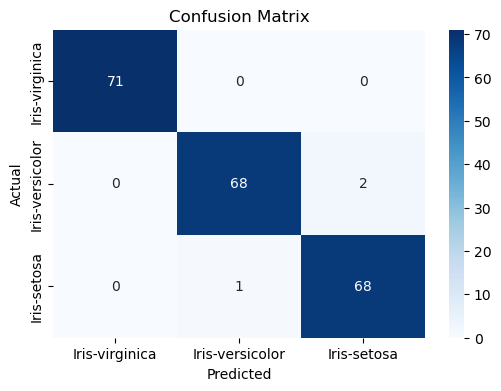


Training complete! Model and scaler saved.


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras import layers, models
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Iris_processed.csv")

X = df.drop(columns=['Species'])
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(4,)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2, verbose=1)


y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


print("\nModel Evaluation Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("f1 score:",f1_score(y_test,y_pred,average='weighted'))


class_labels = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


model.save("iris_ann_model.h5")
joblib.dump(scaler, "iris_scaler.pkl")

print("\nTraining complete! Model and scaler saved.")